In [ ]:
# Execute this cell to install dependencies
%pip install sf-hamilton[visualization]

# TODO:fix [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dagworks-inc/hamilton/blob/main/examples/hello_world/typed_dict.ipynb) [![GitHub badge](https://img.shields.io/badge/github-view_source-2b3137?logo=github)](https://github.com/dagworks-inc/hamilton/blob/main/examples/hello_world/typed_dict.ipynb)


In [1]:
from typing_extensions import is_typeddict
%load_ext hamilton.plugins.jupyter_magic

/Users/stefankrawczyk/.pyenv/versions/knowledge_retrieval-py39/lib/python3.9/site-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


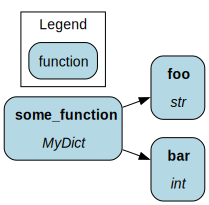

In [2]:
%%cell_to_module ef --display

from typing import TypedDict
from hamilton.function_modifiers import extract_fields

class MyDict(TypedDict):
    foo: str
    bar: int

@extract_fields()
def some_function()->MyDict:
    return MyDict(foo="s", bar=1)

In [3]:
from hamilton import driver

dr = driver.Builder().with_modules(ef).build()
dr.execute(["foo", "bar"])

{'foo': 's', 'bar': 1}

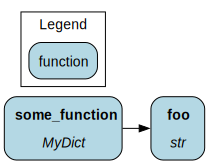

In [4]:
%%cell_to_module ef2 --display

from typing import TypedDict
from hamilton.function_modifiers import extract_fields

class MyDict(TypedDict):
    foo: str
    bar: int

@extract_fields({"foo": str})
def some_function()->MyDict:
    return MyDict(foo="s", bar=1)

In [5]:
from hamilton import driver

dr = driver.Builder().with_modules(ef2).build()
dr.execute(["foo"])

{'foo': 's'}

In [6]:
%%cell_to_module ef3 --display

from typing import TypedDict
from hamilton.function_modifiers import extract_fields

class MyDict(TypedDict):
    foo: str
    bar: int

@extract_fields({"foo": int})
def some_function()->MyDict:
    return MyDict(foo="s", bar=1)

InvalidDecoratorException: Error {'foo': <class 'int'>} do not match TypedDict annotation's fields {'foo': <class 'str'>, 'bar': <class 'int'>}.

In [3]:
from typing import TypedDict
import typing
import typing_inspect
import typing_extensions
from hamilton.function_modifiers import extract_fields

class MyDict(TypedDict):
    foo: str
    bar: int

# @extract_fields(
#     {"foo": str, "bar": int}
# )
def some_function()->MyDict:
    return MyDict(foo="s", bar=1)

output_type = typing.get_type_hints(some_function).get("return")

In [4]:
typing_inspect.is_generic_type(output_type)

False

In [5]:
typing_extensions.is_typeddict(output_type)

True

In [7]:
typing.get_type_hints(MyDict)

{'foo': str, 'bar': int}